In [8]:
import glob
import numpy as np
import matplotlib.pyplot as plt

x=np.genfromtxt('dia.txt',delimiter=',')

In [3]:
val = x[:,:8]#cargo las letras en una lista llamada letters
sal = x[:,8]#cargo los valores en una lista llamada val
val = (val-np.min(val, axis = 0))/(np.max(val, axis = 0)-np.min(val, axis = 0))
X = np.array(val)
Numero_Filas_Datos = X.shape[0] #Obteniendo la cantidad de elementos en una lista, es decir la cantidad de filas

N_datos_entrenamiento = int(Numero_Filas_Datos*0.7) 
N_datos_validacion = int(Numero_Filas_Datos*0.15) 
N_datos_prueba = Numero_Filas_Datos - N_datos_validacion - N_datos_entrenamiento 
matrix_normalizado = X 
matrix_salida = sal 

matrix_entrenamiento = matrix_normalizado[:N_datos_entrenamiento,:] 
matrix_salida_entrenamiento = matrix_salida[:N_datos_entrenamiento] 
matrix_validacion = matrix_normalizado[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion),:] 
matrix_salida_validacion = matrix_salida[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion)] 
matrix_prueba = matrix_normalizado[N_datos_validacion:(N_datos_validacion+N_datos_prueba),:] 
matrix_salida_prueba = matrix_salida[N_datos_validacion:(N_datos_validacion+N_datos_prueba)] 


In [11]:
def sigmoid(x,deriv=False):
    return 1/(1+np.exp(-x))
def LogisticRegression(X,y,alpha=0.5,lamda=0.1,iteraciones=1000):   
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]
    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    theta = np.random.rand(N+1,1)
    arr = np.arange(M)
    np.random.shuffle(arr)
    X=X[arr,:]
    y=y[arr]
    for j in range(0,iteraciones):
        h_x = sigmoid(np.dot(X,theta))
        #print("hx")
        J0 = (1-y)*np.log(1-h_x)
        #print("j0")
        J1 = y*np.log(h_x)
        #print("j1")
        J0[np.isinf(J0)]=0
        #print("miro si es infinito j0")
        J1[np.isinf(J1)]=0
        #print("miro si es infinito j1")
        J0 = -1/M * np.sum(J0)
        #print("Opero j0")
        J1 = -1/M * np.sum(J1)      
        #print("Opero j1")
        J = J1+J0
        #print("Opero J suma")
        dJ_dtheta = 1/(M)*np.dot((h_x-y).T,X).T
        #print("Dj tehta")
        theta = theta - alpha* dJ_dtheta
        #print("theta")
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
        #print("iteré: " + str(j))
    return theta
def prediction(X,theta):
    X = np.insert(X,0,1)
    return sigmoid(np.dot(X,theta))
print("inicio entrenamiento")
theta=LogisticRegression(matrix_entrenamiento, matrix_salida_entrenamiento[:,None])
print("final entrenamiento")

inicio entrenamiento
final entrenamiento


In [14]:
def Logist(Train,Labels):
    prediccion = []
    for i in range(0,Train.shape[0]):
        prediccion.append(prediction(Train[i,:],theta))
    #d = {'1. valor predicho':prediccion,'2. etiqueta':matrix_salida_entrenamiento}
    prediccion=np.array(prediccion)  
    accuracy=0
    for i in range (Labels.shape[0]):
        if(prediccion[i]>0.5):
            prediccion[i]=1
        else:
            prediccion[i]=0
    for i in range(Labels.shape[0]):
        if(prediccion[i]==Labels[i]):
            accuracy=accuracy+1;
    accuracy=accuracy/len(prediccion)*100        
    #df = pd.DataFrame(data=d)
    #df
    print(accuracy)
    plt.plot(prediccion,'o')
    plt.plot(Labels,'x')
    plt.show()

76.72253258845437


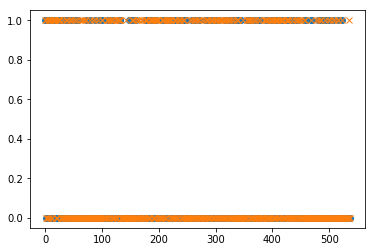

75.0


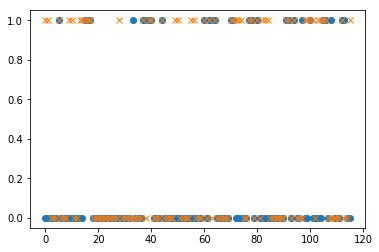

82.6086956521739


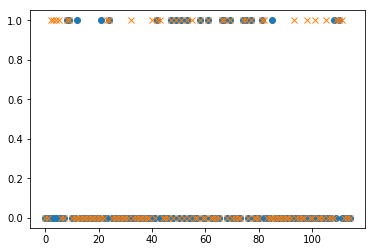

In [15]:
Logist(matrix_entrenamiento,matrix_salida_entrenamiento)

Logist(matrix_prueba,matrix_salida_prueba)

Logist(matrix_validacion,matrix_salida_validacion)